# Product Survery Data Analysis

## Problem statement

1. Predict customer group based on customer information using MCA (Multiple correspondence analysis) Clustering.
2. Find correlation between different interior and exterior components
3. Conduct market basket analysis using association rule mining and find  relationship between interior and exterior components (Provide customization package for customer)


## Import datasets and libraries

In [1]:
!wget -O SURVEY_RESULTS_2024.xlsx "https://docs.google.com/spreadsheets/d/e/2PACX-1vQuESCb9PI3v1XvsfCJd7_pfGnW4s6SnGJ0bT1Q8JS8GTZ5oT8xG-hdRW191vMMUw/pub?output=xlsx"

--2024-03-21 06:08:27--  https://docs.google.com/spreadsheets/d/e/2PACX-1vQuESCb9PI3v1XvsfCJd7_pfGnW4s6SnGJ0bT1Q8JS8GTZ5oT8xG-hdRW191vMMUw/pub?output=xlsx
Resolving docs.google.com (docs.google.com)... 142.250.128.138, 142.250.128.113, 142.250.128.100, ...
Connecting to docs.google.com (docs.google.com)|142.250.128.138|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://doc-0c-20-sheets.googleusercontent.com/pub/54bogvaave6cua4cdnls17ksc4/gnn1u2306j7ma7vo75u5bdie4k/1711001305000/108116709281929912139/*/e@2PACX-1vQuESCb9PI3v1XvsfCJd7_pfGnW4s6SnGJ0bT1Q8JS8GTZ5oT8xG-hdRW191vMMUw?output=xlsx [following]
--2024-03-21 06:08:28--  https://doc-0c-20-sheets.googleusercontent.com/pub/54bogvaave6cua4cdnls17ksc4/gnn1u2306j7ma7vo75u5bdie4k/1711001305000/108116709281929912139/*/e@2PACX-1vQuESCb9PI3v1XvsfCJd7_pfGnW4s6SnGJ0bT1Q8JS8GTZ5oT8xG-hdRW191vMMUw?output=xlsx
Resolving doc-0c-20-sheets.googleusercontent.com (doc-0c-20-sheets.googleusercontent.com).

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

df = pd.read_excel('SURVEY_RESULTS_2024.xlsx')
df.head(5)

,Which age group do you belong to?,What is your gender?,Which category do you currently belong to?,Which of the following best describes you?,Which of these factors are important to you when deciding which car to purchase?,How likely are you to opt for customised vehicle if there were no extra charges?,"Which of the following exterior components would you choose to customise (texture, layout, size, etc)?","Which of the following interior components would you choose to customise (texture, layout, size, etc)?",How much are you willing to spend on car customisation if surcharges are applicable?,Are you interested in designing your own components to personalise your car?,How much are you willing to pay for the personalised design?,"Do you have any 3D design experience that would help with the design process? (e.g. AutoCAD, SolidWorks, Blender, etc)",Please give us any design ideas to make the car uniquely Singaporean.
0,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Functionality;Size;Customisable options,Very likely,Grilles,Centre compartment,100-500,Only with professional help,500-1000,"No, I would need a designer to model my sketch",NaN
1,20-30,Female,"Do not own a car, but planning to purchase in ...",Single,Price;Brand name;Aesthetics;Technological feat...,Likely,Wheels;Grilles;Headlights;Side mirrors,Centre compartment,under 500,Only with professional help,under 500,"No, I would need a designer to model my sketch",wheels that look like the singapore flyer
2,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Aesthetics;Functionality;Customisable options,Very likely,Wheels;Grilles;Headlights;Side mirrors,Steering wheel;Dashboard,500-1000,Yes,500-1000,"Yes, I can design on my own",NaN
3,20-30,Female,"Do not own a car, but planning to purchase in ...",Single,Price;Brand name;Aesthetics;Technological feat...,Very likely,Wheels;Grilles;Headlights;Side mirrors;Bumpers,Steering wheel;Centre compartment;Door handles...,under 500,Yes,under 500,"No, I would need a designer to model my sketch",NaN
4,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Brand name;Aesthetics;Technological feat...,Very likely,Wheels;Grilles;Headlights;Bumpers,Steering wheel;Centre compartment,over 1000,Only with professional help,over 1000,"No, I would need a designer to model my sketch",Sg flag/ colour related car paint


## Exploratory data analysis


In [ ]:
df.describe()

,Which age group do you belong to?,What is your gender?,Which category do you currently belong to?,Which of the following best describes you?,Which of these factors are important to you when deciding which car to purchase?,How likely are you to opt for customised vehicle if there were no extra charges?,"Which of the following exterior components would you choose to customise (texture, layout, size, etc)?","Which of the following interior components would you choose to customise (texture, layout, size, etc)?",How much are you willing to spend on car customisation if surcharges are applicable?,Are you interested in designing your own components to personalise your car?,How much are you willing to pay for the personalised design?,"Do you have any 3D design experience that would help with the design process? (e.g. AutoCAD, SolidWorks, Blender, etc)",Please give us any design ideas to make the car uniquely Singaporean.
count,50,50,50,50,49,50,49,50,50,50,50,50,17
unique,4,3,3,3,37,3,23,16,5,3,4,2,17
top,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Brand name;Aesthetics;Technological feat...,Very likely,Wheels,Dashboard,500-1000,Only with professional help,500-1000,"No, I would need a designer to model my sketch",wheels that look like the singapore flyer
freq,41,32,36,38,5,37,8,11,19,26,21,33,1


In [ ]:
def perform_EDA(dataframe):
    print("Dataset Information ".center(50, '-'))
    print('')
    print(dataframe.info())
    print('')
    print("Duplicated Values ".center(50, '-'))
    print('')
    print('Sum of Duplicated Values:', dataframe.duplicated().sum())
    print('')
    print('')
    print("Unique Values ".center(50, '-'))
    print('')
    print(dataframe.nunique())
    print('')

perform_EDA(df)

---------------Dataset Information ---------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                  --------------  ----- 
 0   Which age group do you belong to?                                                                                       50 non-null     object
 1   What is your gender?                                                                                                    50 non-null     object
 2   Which category do you currently belong to?                                                                              50 non-null     object
 3   Which of the following best describes you?                                                          

In [ ]:
def find_col_dtypes(data, ord_th):
    num_cols = data.select_dtypes("number").columns.tolist()
    cat_cols = data.select_dtypes("object").columns.tolist()

    ordinals = [col for col in num_cols if data[col].nunique() < ord_th]

    return num_cols, ordinals, cat_cols

num_cols, ordinals, cat_cols = find_col_dtypes(df, 20)

print(f"Num Cols: {len(num_cols)}\n")
print(f"Cat Cols: {len(cat_cols)}\n")
print(f"Ordinal Cols: {len(ordinals)}")

Num Cols: 0

Cat Cols: 13

Ordinal Cols: 0


In [ ]:
filtered_cat_cols = [col for col in cat_cols if df[col].nunique() <= 5]

filtered_cat_df = pd.DataFrame({'Categorical Columns': filtered_cat_cols})
pd.set_option('display.max_colwidth', None)

print(filtered_cat_df)

                                                                                                      Categorical Columns
0                                                                                       Which age group do you belong to?
1                                                                                                    What is your gender?
2                                                                              Which category do you currently belong to?
3                                                                              Which of the following best describes you?
4                                       How likely are you to opt for customised vehicle if there were no extra charges? 
5                                    How much are you willing to spend on car customisation if surcharges are applicable?
6                                           Are you interested in designing your own components to personalise your car? 
7                       

<ipython-input-7-0650d9558eab>:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


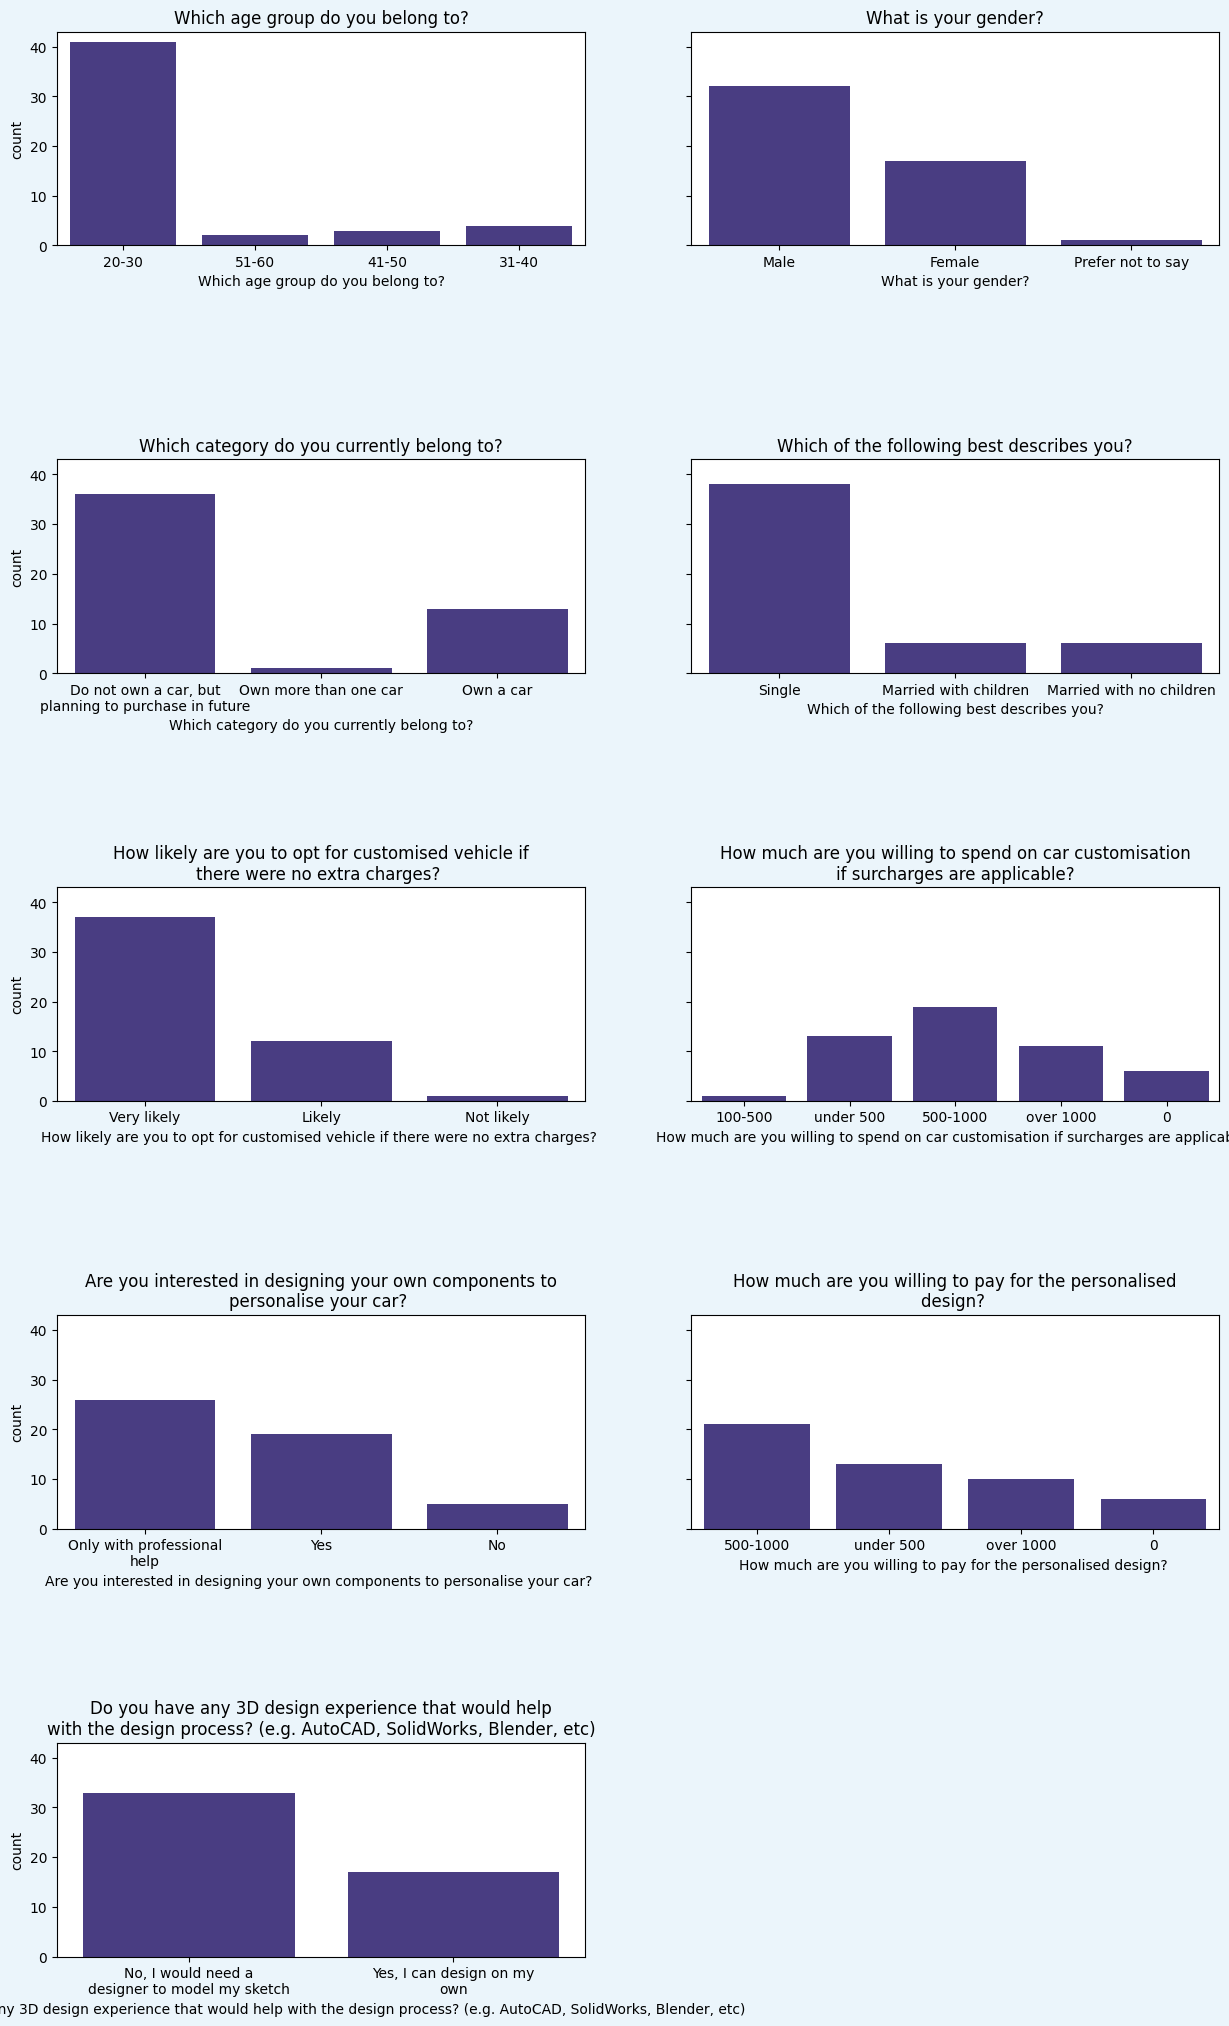

In [ ]:
# Wrap title for better visualization
def wrap_title(title, max_length=55):
    if len(title) > max_length:
        break_point = title.rfind(' ', 0, max_length)
        if break_point == -1:
            break_point = max_length
        title = f'{title[:break_point]}\n{title[break_point+1:]}'
    return title

def cat_summary(dataframe, cat_cols, max_categories=5):
    filtered_cat_cols = [col for col in cat_cols if dataframe[col].nunique() <= max_categories] # Sort out "REAL" categorical variables
    num_cols = len(filtered_cat_cols)
    num_rows = (num_cols + 1) // 2

    if num_rows == 0:
        print("No categorical columns meet the criteria.")
        return

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows), sharey=True, gridspec_kw={'hspace': 1.0})
    fig.patch.set_facecolor('#EBF5FB')
    flat_axes = axes.flatten()

    for i, col_name in enumerate(filtered_cat_cols):
        row_index = i // 2
        col_index = i % 2
        sns.countplot(x=dataframe[col_name], data=dataframe, color='#42328d', ax=flat_axes[i])

        labels = [wrap_title(label.get_text(), max_length=25) for label in flat_axes[i].get_xticklabels()]
        plt.sca(flat_axes[i])
        plt.xticks(flat_axes[i].get_xticks(), labels)

        wrapped_title = wrap_title(col_name)
        flat_axes[i].set_title(wrapped_title, fontsize=12)
        flat_axes[i].tick_params(axis='x')

    for i in range(num_cols, num_rows * 2):
        fig.delaxes(flat_axes[i])

    plt.tight_layout()
    plt.show()

cat_summary(df, cat_cols)


## Data cleaning / Feature engineering

In [ ]:
df.describe()

,Which age group do you belong to?,What is your gender?,Which category do you currently belong to?,Which of the following best describes you?,Which of these factors are important to you when deciding which car to purchase?,How likely are you to opt for customised vehicle if there were no extra charges?,"Which of the following exterior components would you choose to customise (texture, layout, size, etc)?","Which of the following interior components would you choose to customise (texture, layout, size, etc)?",How much are you willing to spend on car customisation if surcharges are applicable?,Are you interested in designing your own components to personalise your car?,How much are you willing to pay for the personalised design?,"Do you have any 3D design experience that would help with the design process? (e.g. AutoCAD, SolidWorks, Blender, etc)",Please give us any design ideas to make the car uniquely Singaporean.
count,50,50,50,50,49,50,49,50,50,50,50,50,17
unique,4,3,3,3,37,3,23,16,5,3,4,2,17
top,20-30,Male,"Do not own a car, but planning to purchase in future",Single,Price;Brand name;Aesthetics;Technological features;Functionality;Size,Very likely,Wheels,Dashboard,500-1000,Only with professional help,500-1000,"No, I would need a designer to model my sketch",wheels that look like the singapore flyer
freq,41,32,36,38,5,37,8,11,19,26,21,33,1


In [ ]:
# Fill missing column with None
def preprocess(df):

    for col in df.select_dtypes(exclude='number').columns:
        df[col] = df[col].fillna('None')

    for col in df.select_dtypes(include='number').columns:
        df[col] = df[col].fillna(0)

    return df

cleaned_df = preprocess(df)
cleaned_df.describe()

,Which age group do you belong to?,What is your gender?,Which category do you currently belong to?,Which of the following best describes you?,Which of these factors are important to you when deciding which car to purchase?,How likely are you to opt for customised vehicle if there were no extra charges?,"Which of the following exterior components would you choose to customise (texture, layout, size, etc)?","Which of the following interior components would you choose to customise (texture, layout, size, etc)?",How much are you willing to spend on car customisation if surcharges are applicable?,Are you interested in designing your own components to personalise your car?,How much are you willing to pay for the personalised design?,"Do you have any 3D design experience that would help with the design process? (e.g. AutoCAD, SolidWorks, Blender, etc)",Please give us any design ideas to make the car uniquely Singaporean.
count,50,50,50,50,50,50,50,50,50,50,50,50,50
unique,4,3,3,3,38,3,24,16,5,3,4,2,18
top,20-30,Male,"Do not own a car, but planning to purchase in future",Single,Price;Brand name;Aesthetics;Technological features;Functionality;Size,Very likely,Wheels,Dashboard,500-1000,Only with professional help,500-1000,"No, I would need a designer to model my sketch",None
freq,41,32,36,38,5,37,8,11,19,26,21,33,33


In [ ]:
df = pd.read_excel('SURVEY_RESULTS_2024.xlsx')
cleaned_df = preprocess(df)
test = cleaned_df.copy()

In [ ]:
def extract_attributes(column_data):
    all_attributes = []
    unique_attributes = []

    for attributes in column_data:
        attributes_list = attributes.split(';')
        # Exclude "None" while appending other attributes
        all_attributes.extend([attribute.strip() for attribute in attributes_list if attribute.strip() != "None"])

    attribute_counts = pd.Series(all_attributes).value_counts()
    unique_attributes = attribute_counts.index

    return attribute_counts, unique_attributes

factors_count, unique_factors = extract_attributes(test['Which of these factors are important to you when deciding which car to purchase?'])
factors_count, unique_factors

(Price                                        44
 Functionality                                34
 Brand name                                   34
 Technological features                       32
 Aesthetics                                   31
 Size                                         26
 Sustainability/environment considerations    17
 Customisable options                          9
 dtype: int64,
 Index(['Price', 'Functionality', 'Brand name', 'Technological features',
        'Aesthetics', 'Size', 'Sustainability/environment considerations',
        'Customisable options'],
       dtype='object'))

In [ ]:
exterior_count, unique_exterior = extract_attributes(test['Which of the following exterior components would you choose to customise (texture, layout, size, etc)? '])
exterior_count, unique_exterior

(Wheels                                                     35
 Headlights                                                 27
 Grilles                                                    21
 Bumpers                                                    16
 Side mirrors                                               15
 Brakes                                                      1
 doors                                                       1
 add body kit and change the exhaust and tune the engine     1
 dtype: int64,
 Index(['Wheels', 'Headlights', 'Grilles', 'Bumpers', 'Side mirrors', 'Brakes',
        'doors', 'add body kit and change the exhaust and tune the engine'],
       dtype='object'))

In [ ]:
interior_count, unique_interior = extract_attributes(test['Which of the following interior components would you choose to customise (texture, layout, size, etc)? '])
interior_count, unique_interior

(Dashboard                           34
 Steering wheel                      28
 Centre compartment                  23
 Door handles                        15
 Sun blocker for front passengers     1
 air vent                             1
 dtype: int64,
 Index(['Dashboard', 'Steering wheel', 'Centre compartment', 'Door handles',
        'Sun blocker for front passengers', 'air vent'],
       dtype='object'))

In [ ]:
def encode_column(df, column_name, unique_x, category_prefix):
    for attribute in unique_x:
        df[f"{category_prefix}_{attribute.lower().replace(' ', '_')}"] = df[column_name].apply(lambda x: 1 if attribute in x.split(';') else 0)

    df.drop(column_name, axis=1, inplace=True)

encode_column(test, 'Which of these factors are important to you when deciding which car to purchase?', unique_factors, 'purchasefactor')
encode_column(test, 'Which of the following exterior components would you choose to customise (texture, layout, size, etc)? ', unique_exterior, 'exteriorcomp')
encode_column(test, 'Which of the following interior components would you choose to customise (texture, layout, size, etc)? ', unique_interior, 'interiorcomp')

test.head(5)

,Which age group do you belong to?,What is your gender?,Which category do you currently belong to?,Which of the following best describes you?,How likely are you to opt for customised vehicle if there were no extra charges?,How much are you willing to spend on car customisation if surcharges are applicable?,Are you interested in designing your own components to personalise your car?,How much are you willing to pay for the personalised design?,"Do you have any 3D design experience that would help with the design process? (e.g. AutoCAD, SolidWorks, Blender, etc)",Please give us any design ideas to make the car uniquely Singaporean.,...,exteriorcomp_side_mirrors,exteriorcomp_brakes,exteriorcomp_doors,exteriorcomp_add_body_kit_and_change_the_exhaust_and_tune_the_engine,interiorcomp_dashboard,interiorcomp_steering_wheel,interiorcomp_centre_compartment,interiorcomp_door_handles,interiorcomp_sun_blocker_for_front_passengers,interiorcomp_air_vent
0,20-30,Male,"Do not own a car, but planning to purchase in future",Single,Very likely,100-500,Only with professional help,500-1000,"No, I would need a designer to model my sketch",None,...,0,0,0,0,0,0,1,0,0,0
1,20-30,Female,"Do not own a car, but planning to purchase in future",Single,Likely,under 500,Only with professional help,under 500,"No, I would need a designer to model my sketch",wheels that look like the singapore flyer,...,1,0,0,0,0,0,1,0,0,0
2,20-30,Male,"Do not own a car, but planning to purchase in future",Single,Very likely,500-1000,Yes,500-1000,"Yes, I can design on my own",None,...,1,0,0,0,1,1,0,0,0,0
3,20-30,Female,"Do not own a car, but planning to purchase in future",Single,Very likely,under 500,Yes,under 500,"No, I would need a designer to model my sketch",None,...,1,0,0,0,1,1,1,1,0,0
4,20-30,Male,"Do not own a car, but planning to purchase in future",Single,Very likely,over 1000,Only with professional help,over 1000,"No, I would need a designer to model my sketch",Sg flag/ colour related car paint,...,0,0,0,0,0,1,1,0,0,0


In [ ]:
def encode_categorical_columns(df, column_name):
    unique_categories = df[column_name].unique()

    for category in unique_categories:
        new_column_name = f"{column_name}_{category}"
        df[new_column_name] = df[column_name].apply(lambda x: 1 if x == category else 0)

    df.drop(column_name, axis=1, inplace=True)

columns_for_clustering = [
    'Which age group do you belong to?',
    'What is your gender?',
    'Which category do you currently belong to?',
    'Which of the following best describes you?',
    'How likely are you to opt for customised vehicle if there were no extra charges? ',
    'How much are you willing to spend on car customisation if surcharges are applicable?',
    'Are you interested in designing your own components to personalise your car? ',
    'How much are you willing to pay for the personalised design? ',
    'Do you have any 3D design experience that would help with the design process? (e.g. AutoCAD, SolidWorks, Blender, etc)'
]

for column in columns_for_clustering:
    encode_categorical_columns(test, column)

test = test.drop('Please give us any design ideas to make the car uniquely Singaporean.', axis=1)
test.head(5)

,purchasefactor_price,purchasefactor_functionality,purchasefactor_brand_name,purchasefactor_technological_features,purchasefactor_aesthetics,purchasefactor_size,purchasefactor_sustainability/environment_considerations,purchasefactor_customisable_options,exteriorcomp_wheels,exteriorcomp_headlights,...,How much are you willing to spend on car customisation if surcharges are applicable?_0,Are you interested in designing your own components to personalise your car? _Only with professional help,Are you interested in designing your own components to personalise your car? _Yes,Are you interested in designing your own components to personalise your car? _No,How much are you willing to pay for the personalised design? _500-1000,How much are you willing to pay for the personalised design? _under 500,How much are you willing to pay for the personalised design? _over 1000,How much are you willing to pay for the personalised design? _0,"Do you have any 3D design experience that would help with the design process? (e.g. AutoCAD, SolidWorks, Blender, etc)_No, I would need a designer to model my sketch","Do you have any 3D design experience that would help with the design process? (e.g. AutoCAD, SolidWorks, Blender, etc)_Yes, I can design on my own"
0,1,1,0,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
1,1,1,1,1,1,1,1,0,1,1,...,0,1,0,0,0,1,0,0,1,0
2,0,1,0,0,1,0,0,1,1,1,...,0,0,1,0,1,0,0,0,0,1
3,1,1,1,1,1,1,1,1,1,1,...,0,0,1,0,0,1,0,0,1,0
4,1,1,1,1,1,0,0,0,1,1,...,0,1,0,0,0,0,1,0,1,0


## Clustering

### KModes

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

cluster_df = cleaned_df.copy()[columns_for_clustering]
cluster_df = cluster_df.astype(str)

In [ ]:
!pip install kmodes

In [ ]:
import kmodes
from kmodes.kmodes import KModes

# Assuming 'cluster_df' is your DataFrame with categorical columns
# Specify the number of clusters
num_clusters = 3

# Initialize the K-Modes model
kmodes = KModes(n_clusters=num_clusters, init='Huang', n_init=5, verbose=1, random_state=42)

# Fit the model to your data
clusters = kmodes.fit_predict(cluster_df)

# Add the cluster labels to your original DataFrame
cluster_df['Cluster'] = clusters

# Display the resulting clusters
print(cluster_df['Cluster'].value_counts())


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7, cost: 126.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 14, cost: 140.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 10, cost: 122.0
Run 3, iteration: 2/100, moves: 4, cost: 122.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 3, cost: 132.0
Run 4, iteration: 2/100, moves: 4, cost: 132.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 12, cost: 126.0
Run 5, iteration: 2/100, moves: 13, cost: 122.0
Run 5, iteration: 3/100, moves: 1, cost: 122.0
Best run was number 3
1    21
0    21
2     8
Name: Cluster, dtype: int64


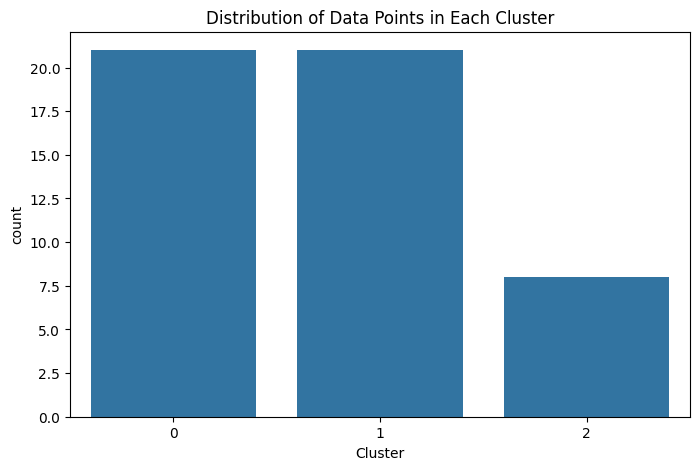

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=cluster_df)
plt.title('Distribution of Data Points in Each Cluster')
plt.show()

In [ ]:
cluster_profiles = cluster_df.groupby('Cluster').agg(lambda x: x.value_counts().index[0]).reset_index()
print(cluster_profiles)

   Cluster Which age group do you belong to? What is your gender?  \
0        0                             20-30               Female   
1        1                             20-30                 Male   
2        2                             20-30                 Male   

             Which category do you currently belong to?  \
0  Do not own a car, but planning to purchase in future   
1  Do not own a car, but planning to purchase in future   
2  Do not own a car, but planning to purchase in future   

  Which of the following best describes you?  \
0                                     Single   
1                                     Single   
2                                     Single   

  How likely are you to opt for customised vehicle if there were no extra charges?   \
0                                                                       Very likely   
1                                                                       Very likely   
2                               

In [ ]:
for cluster_num in cluster_df['Cluster'].unique():
    cluster_data = cluster_df[cluster_df['Cluster'] == cluster_num]
    print(f"\nCluster {cluster_num} Characteristics:")
    print(cluster_data.describe(include='all'))


Cluster 1 Characteristics:
       Which age group do you belong to? What is your gender?  \
count                                 21                   21   
unique                                 3                    2   
top                                20-30                 Male   
freq                                  18                   19   
mean                                 NaN                  NaN   
std                                  NaN                  NaN   
min                                  NaN                  NaN   
25%                                  NaN                  NaN   
50%                                  NaN                  NaN   
75%                                  NaN                  NaN   
max                                  NaN                  NaN   

                  Which category do you currently belong to?  \
count                                                     21   
unique                                                     3   

### MCA + Kmodes

In [ ]:
!pip install prince
!pip install kmodes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.6/415.6 kB 6.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from prince import MCA

categorical_columns = [
    'Which age group do you belong to?',
    'What is your gender?',
    'Which category do you currently belong to?',
    'Which of the following best describes you?',
    'How likely are you to opt for customised vehicle if there were no extra charges? ',
    'How much are you willing to spend on car customisation if surcharges are applicable?',
    'Are you interested in designing your own components to personalise your car? ',
    'How much are you willing to pay for the personalised design? ',
    'Do you have any 3D design experience that would help with the design process? (e.g. AutoCAD, SolidWorks, Blender, etc)'
]

mca_df = cleaned_df.copy()[columns_for_clustering]
mca_df = mca_df.astype(str)

# Initialize the MCA model
mca = MCA(n_components=2)

# Fit and transform the MCA model on the categorical data
df_mca = mca.fit_transform(mca_df)
loadings = mca.row_coordinates(mca_df)

# Add the MCA components to the original DataFrame
mca_df[['MCA Component 1', 'MCA Component 2']] = df_mca

# Display the resulting DataFrame
print(mca_df.head(10))

  Which age group do you belong to? What is your gender?  \
0                             20-30                 Male   
1                             20-30               Female   
2                             20-30                 Male   
3                             20-30               Female   
4                             20-30                 Male   
5                             20-30                 Male   
6                             20-30                 Male   
7                             51-60               Female   
8                             20-30                 Male   
9                             41-50                 Male   

             Which category do you currently belong to?  \
0  Do not own a car, but planning to purchase in future   
1  Do not own a car, but planning to purchase in future   
2  Do not own a car, but planning to purchase in future   
3  Do not own a car, but planning to purchase in future   
4  Do not own a car, but planning to purchas

In [ ]:
# Access the proportion of total inertia explained by each component
eigenvalues = mca.eigenvalues_

# Calculate the explained inertia from eigenvalues
explained_inertia = eigenvalues / eigenvalues.sum()

# Display the proportion of total inertia explained by each component
print("Explained Inertia:")
print(explained_inertia)

Explained Inertia:
[0.50229208 0.49770792]


In [ ]:
print(mca.eigenvalues_)

[0.28593565 0.28332607]


In [ ]:
print(mca.column_contributions_)

                                                                                                                                                                              0  \
Which age group do you belong to?_20-30                                                                                                                                0.004237   
Which age group do you belong to?_31-40                                                                                                                                0.083377   
Which age group do you belong to?_41-50                                                                                                                                0.002036   
Which age group do you belong to?_51-60                                                                                                                                0.003408   
What is your gender?_Female                                                                              

In [ ]:
from kmodes.kmodes import KModes

# Specify the MCA components and other numerical features
numerical_columns = ['MCA Component 1', 'MCA Component 2']
features_for_clustering = categorical_columns + numerical_columns

# Initialize the K-Modes model
num_clusters = 3
kmodes = KModes(n_clusters=num_clusters, init='Huang', n_init=5, verbose=1, random_state=42)

# Fit the model to your data
clusters = kmodes.fit_predict(mca_df[features_for_clustering])

# Add the cluster labels to your original DataFrame
mca_df['Cluster'] = clusters

# Display the resulting clusters
print(mca_df['Cluster'].value_counts())


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 11, cost: 208.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 4, cost: 243.0
Run 2, iteration: 2/100, moves: 0, cost: 243.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 4, cost: 212.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2, cost: 216.0
Run 4, iteration: 2/100, moves: 1, cost: 216.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 12, cost: 212.0
Run 5, iteration: 2/100, moves: 11, cost: 208.0
Run 5, iteration: 3/100, moves: 1, cost: 208.0
Best run was number 1
0    26
1    16
2     8
Name: Cluster, dtype: int64


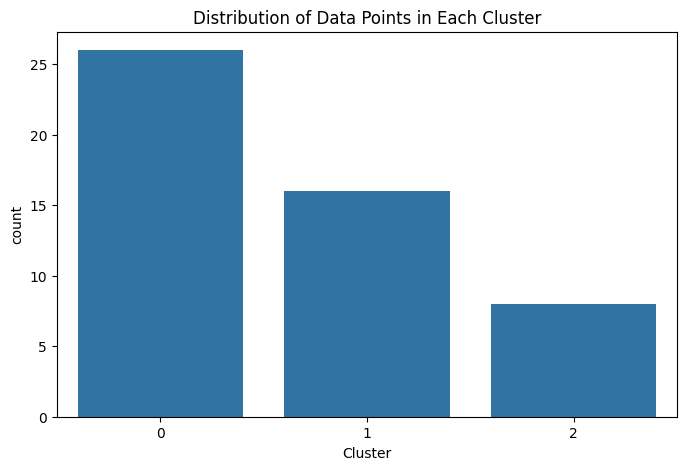

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=mca_df)
plt.title('Distribution of Data Points in Each Cluster')
plt.show()


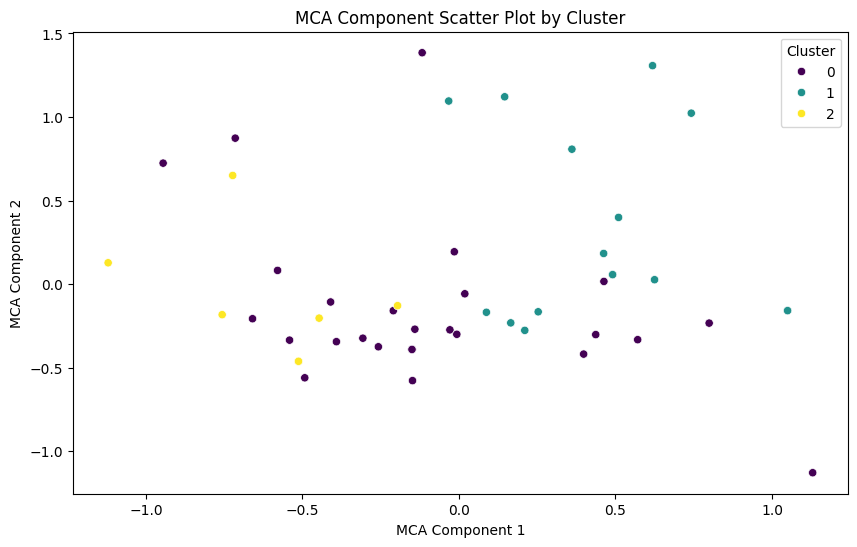

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MCA Component 1', y='MCA Component 2', hue='Cluster', data=mca_df, palette='viridis')
plt.title('MCA Component Scatter Plot by Cluster')
plt.show()

In [ ]:
cluster_profiles = mca_df.groupby('Cluster').agg(lambda x: x.value_counts().index[0]).reset_index()
print(cluster_profiles)

   Cluster Which age group do you belong to? What is your gender?  \
0        0                             20-30                 Male   
1        1                             20-30               Female   
2        2                             20-30                 Male   

             Which category do you currently belong to?  \
0  Do not own a car, but planning to purchase in future   
1  Do not own a car, but planning to purchase in future   
2  Do not own a car, but planning to purchase in future   

  Which of the following best describes you?  \
0                                     Single   
1                                     Single   
2                                     Single   

  How likely are you to opt for customised vehicle if there were no extra charges?   \
0                                                                       Very likely   
1                                                                       Very likely   
2                               

In [ ]:
for cluster_num in mca_df['Cluster'].unique():
    cluster_data = mca_df[mca_df['Cluster'] == cluster_num]
    print(f"\nCluster {cluster_num} Characteristics:")
    print(cluster_data.describe(include='all'))


Cluster 0 Characteristics:
       Which age group do you belong to? What is your gender?  \
count                                 26                   26   
unique                                 3                    3   
top                                20-30                 Male   
freq                                  23                   22   
mean                                 NaN                  NaN   
std                                  NaN                  NaN   
min                                  NaN                  NaN   
25%                                  NaN                  NaN   
50%                                  NaN                  NaN   
75%                                  NaN                  NaN   
max                                  NaN                  NaN   

                  Which category do you currently belong to?  \
count                                                     26   
unique                                                     3   

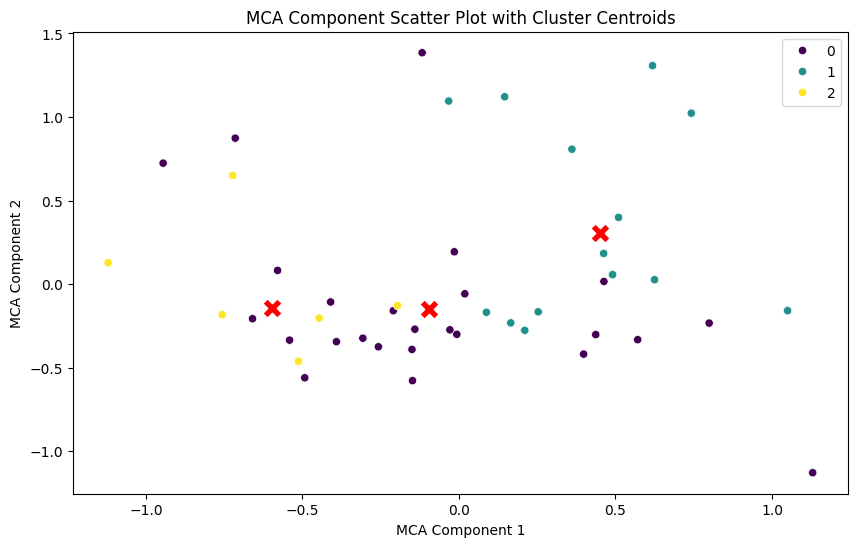

In [ ]:
# Calculate centroids manually
centroids = mca_df.groupby('Cluster')[numerical_columns].mean().reset_index()

# Scatter plot of MCA components with cluster centroids
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MCA Component 1', y='MCA Component 2', hue='Cluster', data=mca_df, palette='viridis')
sns.scatterplot(x=centroids['MCA Component 1'], y=centroids['MCA Component 2'], marker='X', s=200, color='red')
plt.title('MCA Component Scatter Plot with Cluster Centroids')
plt.show()


## Correlation

In [ ]:
column_names = test.columns
print(column_names)

Index(['purchasefactor_price', 'purchasefactor_functionality',
       'purchasefactor_brand_name', 'purchasefactor_technological_features',
       'purchasefactor_aesthetics', 'purchasefactor_size',
       'purchasefactor_sustainability/environment_considerations',
       'purchasefactor_customisable_options', 'exteriorcomp_wheels',
       'exteriorcomp_headlights', 'exteriorcomp_grilles',
       'exteriorcomp_bumpers', 'exteriorcomp_side_mirrors',
       'exteriorcomp_brakes', 'exteriorcomp_doors',
       'exteriorcomp_add_body_kit_and_change_the_exhaust_and_tune_the_engine',
       'interiorcomp_dashboard', 'interiorcomp_steering_wheel',
       'interiorcomp_centre_compartment', 'interiorcomp_door_handles',
       'interiorcomp_sun_blocker_for_front_passengers',
       'interiorcomp_air_vent', 'Which age group do you belong to?_20-30',
       'Which age group do you belong to?_51-60',
       'Which age group do you belong to?_41-50',
       'Which age group do you belong to?_31-40', 

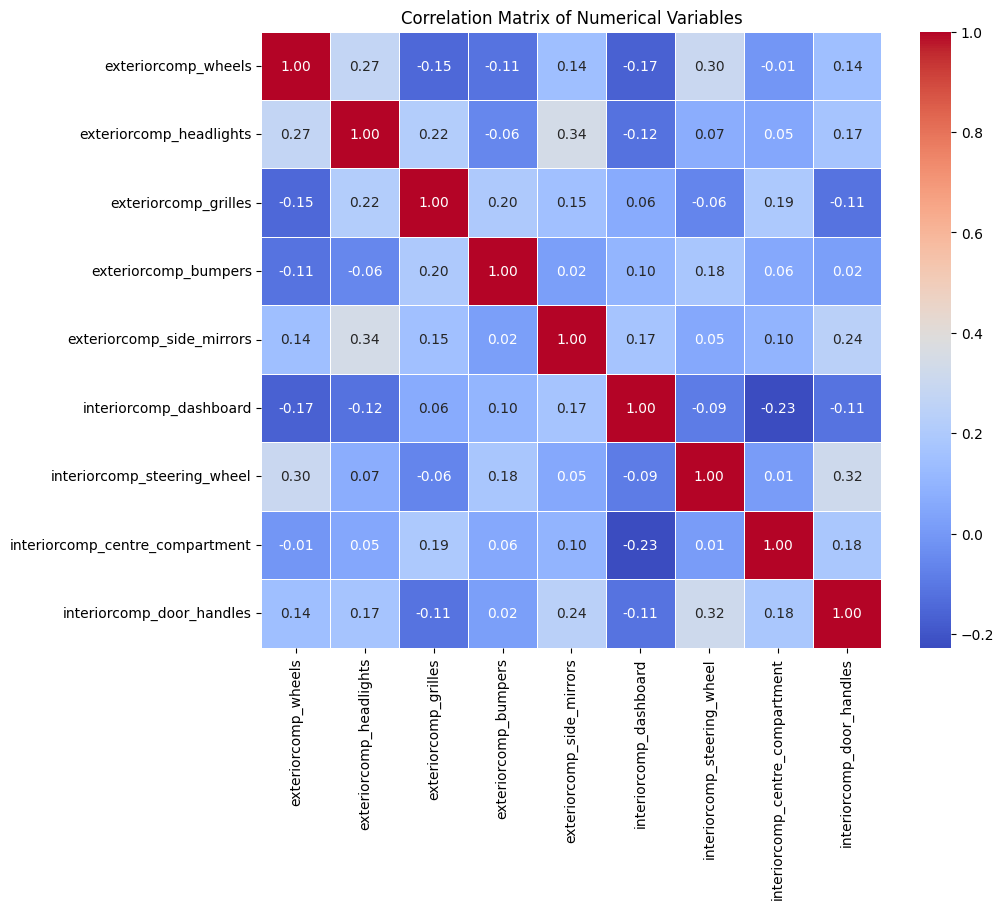

In [ ]:
# Columns for correlation overall
columns_for_correlation_overall = ['exteriorcomp_wheels','exteriorcomp_headlights','exteriorcomp_grilles','exteriorcomp_bumpers' ,'exteriorcomp_side_mirrors','interiorcomp_dashboard','interiorcomp_steering_wheel','interiorcomp_centre_compartment','interiorcomp_door_handles']

# Compute the correlation matrix
correlation_matrix_overall =test[columns_for_correlation_overall].corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_overall, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


From this heatmap, we can found that a person like to customize side mirrors have high chance want to customize headlights and door handles. Besides, those who customized steering wheel also customized wheels as well.

## Association Rule Mining


Market Basket Analysis: if A is bought, then B is likely to bought as well


In [ ]:
print(test.columns)

Index(['purchasefactor_price', 'purchasefactor_functionality',
       'purchasefactor_brand_name', 'purchasefactor_technological_features',
       'purchasefactor_aesthetics', 'purchasefactor_size',
       'purchasefactor_sustainability/environment_considerations',
       'purchasefactor_customisable_options', 'exteriorcomp_wheels',
       'exteriorcomp_headlights', 'exteriorcomp_grilles',
       'exteriorcomp_bumpers', 'exteriorcomp_side_mirrors',
       'exteriorcomp_brakes', 'exteriorcomp_doors',
       'exteriorcomp_add_body_kit_and_change_the_exhaust_and_tune_the_engine',
       'interiorcomp_dashboard', 'interiorcomp_steering_wheel',
       'interiorcomp_centre_compartment', 'interiorcomp_door_handles',
       'interiorcomp_sun_blocker_for_front_passengers',
       'interiorcomp_air_vent', 'Which age group do you belong to?_20-30',
       'Which age group do you belong to?_51-60',
       'Which age group do you belong to?_41-50',
       'Which age group do you belong to?_31-40', 

### Exterior Components

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

ext=[  'exteriorcomp_wheels',
       'exteriorcomp_headlights', 'exteriorcomp_grilles',
       'exteriorcomp_bumpers', 'exteriorcomp_side_mirrors',
       'exteriorcomp_brakes', 'exteriorcomp_doors',
       'exteriorcomp_add_body_kit_and_change_the_exhaust_and_tune_the_engine']

components=test[ext].astype('bool')

frequent_itemsets = apriori(components, min_support=0.0001, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift")

rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(exteriorcomp_headlights),(exteriorcomp_wheels),0.54,0.70,0.44,0.814815,1.164021,0.0620,1.620000,0.306324
1,(exteriorcomp_wheels),(exteriorcomp_headlights),0.70,0.54,0.44,0.628571,1.164021,0.0620,1.238462,0.469697
11,(exteriorcomp_grilles),(exteriorcomp_headlights),0.42,0.54,0.28,0.666667,1.234568,0.0532,1.380000,0.327586
10,(exteriorcomp_headlights),(exteriorcomp_grilles),0.54,0.42,0.28,0.518519,1.234568,0.0532,1.204615,0.413043
3,(exteriorcomp_grilles),(exteriorcomp_wheels),0.42,0.70,0.26,0.619048,0.884354,-0.0340,0.787500,-0.183983
2,(exteriorcomp_wheels),(exteriorcomp_grilles),0.70,0.42,0.26,0.371429,0.884354,-0.0340,0.922727,-0.303571
15,(exteriorcomp_side_mirrors),(exteriorcomp_headlights),0.30,0.54,0.24,0.800000,1.481481,0.0780,2.300000,0.464286
6,(exteriorcomp_side_mirrors),(exteriorcomp_wheels),0.30,0.70,0.24,0.800000,1.142857,0.0300,1.500000,0.178571
14,(exteriorcomp_headlights),(exteriorcomp_side_mirrors),0.54,0.30,0.24,0.444444,1.481481,0.0780,1.260000,0.706522
7,(exteriorcomp_wheels),(exteriorcomp_side_mirrors),0.70,0.30,0.24,0.342857,1.142857,0.0300,1.065217,0.416667


### Interior Components

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

interior = [       'interiorcomp_dashboard', 'interiorcomp_steering_wheel',
       'interiorcomp_centre_compartment', 'interiorcomp_door_handles',
       'interiorcomp_sun_blocker_for_front_passengers',
       'interiorcomp_air_vent']

components=test[interior].astype('bool')

frequent_itemsets = apriori(components, min_support=0.0001, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift")

rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head(10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(interiorcomp_steering_wheel),(interiorcomp_dashboard),0.56,0.68,0.36,0.642857,0.945378,-0.0208,0.896000,-0.116071
0,(interiorcomp_dashboard),(interiorcomp_steering_wheel),0.68,0.56,0.36,0.529412,0.945378,-0.0208,0.935000,-0.152941
10,(interiorcomp_centre_compartment),(interiorcomp_steering_wheel),0.46,0.56,0.26,0.565217,1.009317,0.0024,1.012000,0.017094
3,(interiorcomp_centre_compartment),(interiorcomp_dashboard),0.46,0.68,0.26,0.565217,0.831202,-0.0528,0.736000,-0.273292
11,(interiorcomp_steering_wheel),(interiorcomp_centre_compartment),0.56,0.46,0.26,0.464286,1.009317,0.0024,1.008000,0.020979
2,(interiorcomp_dashboard),(interiorcomp_centre_compartment),0.68,0.46,0.26,0.382353,0.831202,-0.0528,0.874286,-0.388235
12,(interiorcomp_door_handles),(interiorcomp_steering_wheel),0.30,0.56,0.24,0.800000,1.428571,0.0720,2.200000,0.428571
13,(interiorcomp_steering_wheel),(interiorcomp_door_handles),0.56,0.30,0.24,0.428571,1.428571,0.0720,1.225000,0.681818
16,(interiorcomp_door_handles),(interiorcomp_centre_compartment),0.30,0.46,0.18,0.600000,1.304348,0.0420,1.350000,0.333333
5,(interiorcomp_door_handles),(interiorcomp_dashboard),0.30,0.68,0.18,0.600000,0.882353,-0.0240,0.800000,-0.160000


### Exterior and Interior Components

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

both = [       'interiorcomp_dashboard', 'interiorcomp_steering_wheel',
       'interiorcomp_centre_compartment', 'interiorcomp_door_handles',
       'interiorcomp_sun_blocker_for_front_passengers',
       'interiorcomp_air_vent',

       'exteriorcomp_wheels',
       'exteriorcomp_headlights', 'exteriorcomp_grilles',
       'exteriorcomp_bumpers', 'exteriorcomp_side_mirrors',
       'exteriorcomp_brakes', 'exteriorcomp_doors',
       'exteriorcomp_add_body_kit_and_change_the_exhaust_and_tune_the_engine']

components=test[both].astype('bool')

frequent_itemsets = apriori(components, min_support=0.0001, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift")

rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head(10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
31,(interiorcomp_steering_wheel),(exteriorcomp_wheels),0.56,0.70,0.46,0.821429,1.173469,0.0680,1.680000,0.335968
30,(exteriorcomp_wheels),(interiorcomp_steering_wheel),0.70,0.56,0.46,0.657143,1.173469,0.0680,1.283333,0.492754
76,(exteriorcomp_headlights),(exteriorcomp_wheels),0.54,0.70,0.44,0.814815,1.164021,0.0620,1.620000,0.306324
10,(interiorcomp_dashboard),(exteriorcomp_wheels),0.68,0.70,0.44,0.647059,0.924370,-0.0360,0.850000,-0.203620
77,(exteriorcomp_wheels),(exteriorcomp_headlights),0.70,0.54,0.44,0.628571,1.164021,0.0620,1.238462,0.469697
11,(exteriorcomp_wheels),(interiorcomp_dashboard),0.70,0.68,0.44,0.628571,0.924370,-0.0360,0.861538,-0.214286
1,(interiorcomp_steering_wheel),(interiorcomp_dashboard),0.56,0.68,0.36,0.642857,0.945378,-0.0208,0.896000,-0.116071
0,(interiorcomp_dashboard),(interiorcomp_steering_wheel),0.68,0.56,0.36,0.529412,0.945378,-0.0208,0.935000,-0.152941
12,(exteriorcomp_headlights),(interiorcomp_dashboard),0.54,0.68,0.34,0.629630,0.925926,-0.0272,0.864000,-0.148148
13,(interiorcomp_dashboard),(exteriorcomp_headlights),0.68,0.54,0.34,0.500000,0.925926,-0.0272,0.920000,-0.200000


### Purchasing Factors

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

fact = ['purchasefactor_price', 'purchasefactor_functionality',
       'purchasefactor_brand_name', 'purchasefactor_technological_features',
       'purchasefactor_aesthetics', 'purchasefactor_size',
       'purchasefactor_sustainability/environment_considerations',
       'purchasefactor_customisable_options']

components=test[fact].astype('bool')

frequent_itemsets = apriori(components, min_support=0.0001, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift")

rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head(10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(purchasefactor_brand_name),(purchasefactor_price),0.68,0.88,0.62,0.911765,1.036096,0.0216,1.360000,0.108871
3,(purchasefactor_price),(purchasefactor_brand_name),0.88,0.68,0.62,0.704545,1.036096,0.0216,1.083077,0.290323
4,(purchasefactor_technological_features),(purchasefactor_price),0.64,0.88,0.60,0.937500,1.065341,0.0368,1.920000,0.170370
0,(purchasefactor_functionality),(purchasefactor_price),0.68,0.88,0.60,0.882353,1.002674,0.0016,1.020000,0.008333
5,(purchasefactor_price),(purchasefactor_technological_features),0.88,0.64,0.60,0.681818,1.065341,0.0368,1.131429,0.511111
1,(purchasefactor_price),(purchasefactor_functionality),0.88,0.68,0.60,0.681818,1.002674,0.0016,1.005714,0.022222
6,(purchasefactor_aesthetics),(purchasefactor_price),0.62,0.88,0.58,0.935484,1.063050,0.0344,1.860000,0.156080
7,(purchasefactor_price),(purchasefactor_aesthetics),0.88,0.62,0.58,0.659091,1.063050,0.0344,1.114667,0.494253
16,(purchasefactor_technological_features),(purchasefactor_functionality),0.64,0.68,0.52,0.812500,1.194853,0.0848,1.706667,0.452991
17,(purchasefactor_functionality),(purchasefactor_technological_features),0.68,0.64,0.52,0.764706,1.194853,0.0848,1.530000,0.509615


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

fact = [ 'Are you interested in designing your own components to personalise your car? _Only with professional help',
       'Are you interested in designing your own components to personalise your car? _Yes',
       'Are you interested in designing your own components to personalise your car? _No',
       'How much are you willing to pay for the personalised design? _500-1000',
       'How much are you willing to pay for the personalised design? _under 500',
       'How much are you willing to pay for the personalised design? _over 1000',
       'How much are you willing to pay for the personalised design? _0',
       'Do you have any 3D design experience that would help with the design process? (e.g. AutoCAD, SolidWorks, Blender, etc)_No, I would need a designer to model my sketch',
       'Do you have any 3D design experience that would help with the design process? (e.g. AutoCAD, SolidWorks, Blender, etc)_Yes, I can design on my own']

components=test[fact].astype('bool')

frequent_itemsets = apriori(components, min_support=0.0001, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift")

rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head(10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
6,(Are you interested in designing your own components to personalise your car? _Only with professional help),"(Do you have any 3D design experience that would help with the design process? (e.g. AutoCAD, SolidWorks, Blender, etc)_No, I would need a designer to model my sketch)",0.52,0.66,0.34,0.653846,0.990676,-0.0032,0.982222,-0.019231
7,"(Do you have any 3D design experience that would help with the design process? (e.g. AutoCAD, SolidWorks, Blender, etc)_No, I would need a designer to model my sketch)",(Are you interested in designing your own components to personalise your car? _Only with professional help),0.66,0.52,0.34,0.515152,0.990676,-0.0032,0.990000,-0.026936
26,(How much are you willing to pay for the personalised design? _500-1000),"(Do you have any 3D design experience that would help with the design process? (e.g. AutoCAD, SolidWorks, Blender, etc)_No, I would need a designer to model my sketch)",0.42,0.66,0.26,0.619048,0.937951,-0.0172,0.892500,-0.102381
27,"(Do you have any 3D design experience that would help with the design process? (e.g. AutoCAD, SolidWorks, Blender, etc)_No, I would need a designer to model my sketch)",(How much are you willing to pay for the personalised design? _500-1000),0.66,0.42,0.26,0.393939,0.937951,-0.0172,0.957000,-0.162879
17,(Are you interested in designing your own components to personalise your car? _Yes),"(Do you have any 3D design experience that would help with the design process? (e.g. AutoCAD, SolidWorks, Blender, etc)_No, I would need a designer to model my sketch)",0.38,0.66,0.22,0.578947,0.877193,-0.0308,0.807500,-0.184211
1,(How much are you willing to pay for the personalised design? _500-1000),(Are you interested in designing your own components to personalise your car? _Only with professional help),0.42,0.52,0.22,0.523810,1.007326,0.0016,1.008000,0.012539
0,(Are you interested in designing your own components to personalise your car? _Only with professional help),(How much are you willing to pay for the personalised design? _500-1000),0.52,0.42,0.22,0.423077,1.007326,0.0016,1.005333,0.015152
16,"(Do you have any 3D design experience that would help with the design process? (e.g. AutoCAD, SolidWorks, Blender, etc)_No, I would need a designer to model my sketch)",(Are you interested in designing your own components to personalise your car? _Yes),0.66,0.38,0.22,0.333333,0.877193,-0.0308,0.930000,-0.291667
40,"(Are you interested in designing your own components to personalise your car? _Only with professional help, How much are you willing to pay for the personalised design? _500-1000)","(Do you have any 3D design experience that would help with the design process? (e.g. AutoCAD, SolidWorks, Blender, etc)_No, I would need a designer to model my sketch)",0.22,0.66,0.18,0.818182,1.239669,0.0348,1.870000,0.247863
42,"(How much are you willing to pay for the personalised design? _500-1000, Do you have any 3D design experience that would help with the design process? (e.g. AutoCAD, SolidWorks, Blender, etc)_No, I would need a designer to model my sketch)",(Are you interested in designing your own components to personalise your car? _Only with professional help),0.26,0.52,0.18,0.692308,1.331361,0.0448,1.560000,0.336336
